# Movies analysis

### Description

We are downloading a CSV about movies in digital platforms like Netflix, Disney+, Prime, and others. 

In [50]:
import os

# Import from third party libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings('ignore')

import requests

### Configure pandas

In [51]:
pd.set_option('display.max_columns', None)

### Download dataset from online resource

In [52]:
URL_ONLINE_DATASET = 'https://raw.githubusercontent.com/galileoguzman/data-bedu-movies/main/data/MoviesOnStreamingPlatforms_updated.csv'
response = requests.get(URL_ONLINE_DATASET)
response.raise_for_status()

container_folder = 'data/'
filename = container_folder + 'movies.csv'

if not (os.path.exists(container_folder)):
    print('--------------------------------')
    print('MSG: Dataset container folder does not exists')
    os.makedirs(container_folder)
    print(f'MSG: Dataset container folder is created with name: {container_folder}')
    print('--------------------------------')

with open(filename, 'wb') as csv_file:
    csv_file.write(response.content)
print('File downloaded!!! :D')

File downloaded!!! :D


### Reading datase from folder/file

In [53]:
pd.read_csv?

### Showing first five elements from dataset using pandas

In [54]:
df = pd.read_csv(filename)
df.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


### Taking off unnecesary column from dataset

In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Normalize column names

In [60]:
# Definition onf new function
def clean_column_names(column_name):
    '''
    Function in charge of clean the column names in and standar underscore format
    '''
    return column_name.lower().strip().replace(' ', '_')


df = df.rename(columns=clean_column_names)

In [61]:
df.head()

,id,title,year,age,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Get top 10 based on IMDB ranking

In [68]:
top_10_imdb = df.sort_values(by='imdb', ascending=False)[['title', 'imdb']][:20]
print(top_10_imdb)

                                                   title  imdb
1292   My Next Guest with David Letterman and Shah Ru...   9.3
7220                                  Down, But Not Out!   9.3
6566                                          Square One   9.3
5110                                     Love on a Leash   9.3
6837             Steven Banks: Home Entertainment Center   9.3
7426                                              Bounty   9.3
8458                                      Where's Daddy?   9.1
947                                            Natsamrat   9.1
7491                                      Finding Family   9.1
7267                                   A Dog Named Gucci   9.0
7002                           Escape from Firebase Kate   9.0
3560                                     The Dark Knight   9.0
10249                 8 Wheels & Some Soul Brotha' Music   8.9
8220                                          Lost Kites   8.9
8359                               Stronger Than Bullet

### Create a bar plot using plt and sns

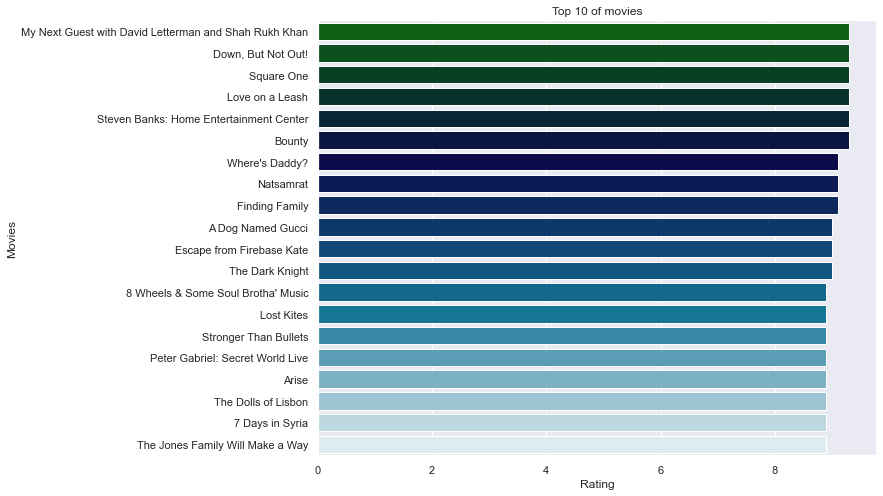

In [69]:
# Configure sns
sns.set()

# Create a plt
plt.figure(figsize=(10, 8))
plt.title('Top 10 of movies')

sns.barplot(data=top_10_imdb, y='title', x='imdb', palette='ocean')

plt.xlabel('Rating')
plt.ylabel('Movies')

# Showing plot
plt.show()